# Chapter I - 

## Read the Adjacency Matrix

In [88]:
adjacency_matrix=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0],
                  [1,1,0,0]
                  ]

### Browsing the rows

In [89]:
for row in adjacency_matrix:
    print (row)

[0, 1, 0, 1]
[1, 0, 1, 1]
[0, 1, 0, 0]
[1, 1, 0, 0]


### Browsing the link information

In [90]:
for row in adjacency_matrix:
    for a_ij in row:
        print (a_ij, " ", end=''),
    print ("\r")

0  1  0  1  
1  0  1  1  
0  1  0  0  
1  1  0  0  


### Directed Networks

In [91]:
#in the case of directed networks the adjacency matrix is not symetric, like for Food Webs
#if a non zero element is present in row 2, column 3, this means there is an arc (directed edge)
#from node 2 toward node 3
adjacency_matrix_directed=[
                  [0,1,0,1],
                  [0,0,1,0],
                  [0,0,0,1],
                  [0,0,0,0]
                  ]

## Basic Statistics

## The Degree

In [93]:
#for the undirected network
degree_node_2=0
for j in adjacency_matrix[1]:
    degree_node_2=degree_node_2+j
print ("degree of node 2:",degree_node_2)

#and for the directed case we already calculated the sum over 
#the rows and columns for the adjacency_matrix_directed
out_degree_node_3 = row_count[2]
in_degree_node_4 = column_count[3]

print ("out_degree node 3:",out_degree_node_3)
print ("in_degree node 4:",in_degree_node_4)

degree of node 2: 3
out_degree node 3: 1
in_degree node 4: 2


### Degree sequence

In [95]:
degree_sequence=[]
for row in range(len(adjacency_matrix)):
    degree=0
    for j in adjacency_matrix[row]:
        degree=degree+j
    degree_sequence.append(degree)

print (degree_sequence)

[2, 3, 1, 2]


## Histogram

In [96]:
# this command is to activate the graphic interface
%pylab inline

Populating the interactive namespace from numpy and matplotlib


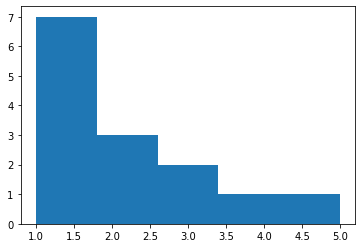

In [99]:
import matplotlib.pyplot as plt

plt.hist([1,1,1,1,1,1,1,2,2,2,3,3,4,5],bins=5)
plt.show()

## Creating Networkx objects

In [101]:
import networkx as nx

#generate an undirected empty graph
G=nx.Graph()

#generate a directed empty graph
DG = nx.DiGraph()

## Degree in Networkx

In [10]:
import networkx as nx

#generate an empty graph
G=nx.Graph()

#define the nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

#link the nodes
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(2,4)

print ("Number of nodes = ", G.number_of_nodes())
print ("Number of edges = ", G.number_of_edges())
print ("Average degree = ", float(2*G.number_of_edges()/G.number_of_nodes()))
print ()

#degrees of each node
for n in G.nodes():
    print ("Node: ", n, "degree = ", G.degree(n))

Number of nodes =  4
Number of edges =  5
Average degree =  2.5

Node:  1 degree =  3
Node:  2 degree =  3
Node:  3 degree =  2
Node:  4 degree =  2


## Distance with Breadth First Search

### Create an undirected graph

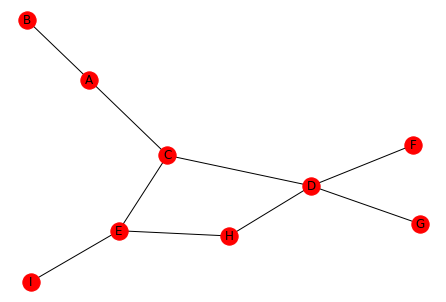

In [21]:
#creating the graph
G=nx.Graph()
G.add_edges_from([('A','B'),('A','C'),('C','D'),('C','E'),('D','F'),
('D','H'),('D','G'),('E','H'),('E','I')])

#printing the neighbors of the node 'A'
print (G.neighbors('A'))

nx.draw(G, node_color='red', with_labels=True)

### Compute distance from A to all nodes using BFS

In [19]:
root_node='A'
queue=[]
queue.append('A')
G.nodes['A']["distance"]=0
while len(queue):
    working_node=queue.pop(0)
    for n in G.neighbors(working_node):
        if len(G.nodes[n])==0:
            G.nodes[n]["distance"]=G.nodes[working_node]["distance"]+1
            queue.append(n)
for n in G.nodes():
    print (n,G.nodes[n]["distance"])

A 0
B 1
C 1
D 2
E 2
F 3
H 3
G 3
I 3


## Reading the file with Food Web data

In [15]:
file_name="./data/Little_Rock_Lake.txt"

DG = nx.DiGraph()

in_file=open(file_name,'r')
while True:
    next_line=in_file.readline()
    if not next_line:
        break
    next_line_fields=next_line[:-2].split(' ')
    node_a=next_line_fields[1] #there is a space in the beginning 
                               #of each edge
    node_b=next_line_fields[2]
    print (node_a,node_b)
    DG.add_edge(node_a, node_b)

0 11
0 61
0 80
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
1 2
1 4
1 6
1 8
1 9
1 13
1 14
2 4
2 116
3 2
3 4
3 6
3 8
3 9
3 13
3 14
3 116
4 4
4 116
5 2
5 4
5 6
5 8
5 9
5 13
5 14
5 116
6 4
6 116
7 2
7 4
7 6
7 8
7 9
7 13
7 14
7 116
8 4
8 116
9 2
9 4
9 6
9 8
9 9
9 116
10 2
10 4
10 6
10 8
10 9
11 2
11 6
11 8
11 9
11 10
12 1
12 3
12 5
12 6
12 7
12 8
12 10
12 13
12 14
12 15
12 16
12 23
12 24
12 36
12 41
12 78
13 1
13 3
13 5
13 7
13 8
13 10
13 13
13 14
13 16
13 23
13 24
13 41
13 78
14 1
14 2
14 3
14 5
14 7
14 8
14 10
14 13
14 14
14 16
14 23
14 24
14 41
14 78
15 1
15 2
15 3
15 5
15 7
15 8
15 10
15 13
15 14
15 15
15 16
15 23
15 24
15 41
15 78
16 1
16 2
16 3
16 5
16 6
16 7
16 8
16 9
16 10

## Trophic Species

## Defining the trophic pattern key
this is a way to generate a unique key starting from the ordered lists of preys and predators attached to nodes

In [16]:
def get_node_key(node):
    out_list=[]
    for out_edge in DG.out_edges(node):
        out_list.append(out_edge[1])
    in_list=[]
    for in_edge in DG.in_edges(node):
        in_list.append(in_edge[0])
    out_list.sort()
    out_list.append('-')
    in_list.sort()
    out_list.extend(in_list)
    return out_list

## Grouping the Trophic Species and Regenerating the Trophic network

In [17]:
def TrophicNetwork(DG):
    trophic={}
    for n in DG.nodes():
        k=tuple(get_node_key(n))
        if not trophic.has_key(k):
            trophic[k]=[]
        trophic[k].append(n)
    for specie in trophic.keys():
        if len(trophic[specie])>1:
            for n in trophic[specie][1:]:
                DG.remove_node(n)
    return DG

#deleting the environment
DG.remove_node('0')

TrophicDG=TrophicNetwork(DG)
print ("S:",TrophicDG.number_of_nodes())
print ("L:",TrophicDG.number_of_edges())
print ("L/S:",float(TrophicDG.number_of_edges())/ \)
TrophicDG.number_of_nodes()

S: 93
L: 1034
L/S: 11.1182795699


## Classes in Food Webs

In [18]:
def compute_classes(DG):
    basal_species=[]
    top_species=[]
    intermediate_species=[]
    for n in DG.nodes():
        if DG.in_degree(n)==0:
            basal_species.append(n)
        elif DG.out_degree(n)==0:
            top_species.append(n)
        else:
            intermediate_species.append(n)
    return (basal_species,intermediate_species,top_species)

(B,I,T)=compute_classes(TrophicDG)
print ("B:",float(len(B))/(len(B)+len(T)+len(I)))
print ("I:",float(len(I))/(len(B)+len(T)+len(I)))
print ("T:",float(len(T))/(len(B)+len(T)+len(I)))

B: 0.129032258065
I: 0.860215053763
T: 0.010752688172


## Proportion of links among classes and ratio prey/predators

In [19]:
def InterclassLinkProportion(DG,C1,C2):
    count=0
    for n1 in C1:
        for n2 in C2:
            if DG.has_edge(n1,n2):
                count+=1
    return float(count)/DG.number_of_edges()
    
print ("links in BT:",InterclassLinkProportion(TrophicDG,B,T))
print ("links in BI:",InterclassLinkProportion(TrophicDG,B,I))
print ("links in II:",InterclassLinkProportion(TrophicDG,I,I))
print ("links in IT:",InterclassLinkProportion(TrophicDG,I,T))

#Ratio prey/predators
print ("P/R:",float((len(B)+len(I)))/(len(I)+len(T)))

links in BT: 0.000967117988395
links in BI: 0.0909090909091
links in II: 0.908123791103
links in IT: 0.0
P/R: 1.13580246914
